In [1]:
import pandas as pd
import numpy as np
import custom as cus

In [2]:
trash = pd.read_csv('./data/trash.csv', encoding='euc-kr')

In [3]:
trash

,항목,구분,중구,서구,동구,영도구,부산진구,동래구,남구,북구,해운대구,사하구,금정구,강서구,연제구,수영구,사상구,기장군
0,매립처리량,연간(톤),2413,2208,1677,1415,17595,8289,7763,9979,4569,4062,7213,6752,3224,3028,9514,1928
1,매립처리량,일일(톤),7,6,4,4,48,23,21,27,12,11,20,19,9,8,26,5
2,소각처리량,연간(톤),14589,10877,8665,9175,167,203,328,252,33979,29126,213,6767,10609,9082,4098,16474
3,소각처리량,일일(톤),40,30,24,25,0,0,1,1,93,80,0,18,29,25,11,45
4,재활용처리량,연간(톤),9382,22121,18941,25780,89529,58866,60966,66266,66333,59522,56033,18366,39137,31881,56968,13625
5,재활용처리량,일일(톤),26,61,52,70,245,161,167,181,181,163,153,50,107,87,156,37
6,음식물류발생량,연간(톤),5842,9165,6535,9864,28469,21184,15636,25055,41741,21741,20314,9669,14909,13815,26349,16233
7,음식물류발생량,일일(톤),16,25,18,27,78,58,43,68,114,59,56,26,41,38,72,44


In [4]:
trash.shape

(8, 18)

In [5]:
trash_year = trash.iloc[[0,2,4,6]]
trash_year

,항목,구분,중구,서구,동구,영도구,부산진구,동래구,남구,북구,해운대구,사하구,금정구,강서구,연제구,수영구,사상구,기장군
0,매립처리량,연간(톤),2413,2208,1677,1415,17595,8289,7763,9979,4569,4062,7213,6752,3224,3028,9514,1928
2,소각처리량,연간(톤),14589,10877,8665,9175,167,203,328,252,33979,29126,213,6767,10609,9082,4098,16474
4,재활용처리량,연간(톤),9382,22121,18941,25780,89529,58866,60966,66266,66333,59522,56033,18366,39137,31881,56968,13625
6,음식물류발생량,연간(톤),5842,9165,6535,9864,28469,21184,15636,25055,41741,21741,20314,9669,14909,13815,26349,16233


In [6]:
trash_year2 = trash_year.pivot_table(columns=trash_year['항목'])

In [7]:
trash_year2['구군'] = trash_year2.index

In [8]:
trash_year2

항목,매립처리량,소각처리량,음식물류발생량,재활용처리량,구군
강서구,6752,6767,9669,18366,강서구
금정구,7213,213,20314,56033,금정구
기장군,1928,16474,16233,13625,기장군
남구,7763,328,15636,60966,남구
동구,1677,8665,6535,18941,동구
동래구,8289,203,21184,58866,동래구
부산진구,17595,167,28469,89529,부산진구
북구,9979,252,25055,66266,북구
사상구,9514,4098,26349,56968,사상구
사하구,4062,29126,21741,59522,사하구


In [9]:
col = ['매립처리량','소각처리량','음식물류발생량','재활용처리량']

In [10]:
trash_year2['폐기물'] = np.sum(trash_year2[col],axis=1)
trash_year2

항목,매립처리량,소각처리량,음식물류발생량,재활용처리량,구군,폐기물
강서구,6752,6767,9669,18366,강서구,41554
금정구,7213,213,20314,56033,금정구,83773
기장군,1928,16474,16233,13625,기장군,48260
남구,7763,328,15636,60966,남구,84693
동구,1677,8665,6535,18941,동구,35818
동래구,8289,203,21184,58866,동래구,88542
부산진구,17595,167,28469,89529,부산진구,135760
북구,9979,252,25055,66266,북구,101552
사상구,9514,4098,26349,56968,사상구,96929
사하구,4062,29126,21741,59522,사하구,114451


In [11]:
indexing=[]
for element in trash_year2.index:
    indexing.append(element.split()[0])
indexing = np.array(indexing)
indexing = indexing.astype(np.object)


In [12]:
trash_year2.set_index(indexing, inplace=True)

In [13]:
trash_year2.index.name='구군'

In [14]:
trash_year2.index

Index(['강서구', '금정구', '기장군', '남구', '동구', '동래구', '부산진구', '북구', '사상구', '사하구',
       '서구', '수영구', '연제구', '영도구', '중구', '해운대구'],
      dtype='object', name='구군')

In [15]:
register = pd.read_csv('./data/register.csv', encoding='euc-kr')

In [16]:
register.shape

(16, 9)

In [17]:
register_sort = register.sort_values('구군')
register_sort

,구군,동수 (개소),세대수 (세대),인구수 (명),남자인구수 (명),여자인구수 (명),시전체 인구에 대한 구성비 (%),면적 (㎢),인구밀도 (명/㎢)
11,강서구,8,48718,124629,66222,58407,3.6,181.49,687
10,금정구,17,105690,248606,121769,126837,7.1,65.27,"3,809"
15,기장군,5,66765,165318,82211,83107,4.7,218.30,757
6,남구,17,115729,283384,139248,144136,8.1,26.81,"10,570"
2,동구,12,43326,89842,44265,45577,2.6,9.74,"9,224"
5,동래구,13,109040,270809,132497,138312,7.7,16.63,"16,284"
4,부산진구,20,166084,370440,180298,190142,10.6,29.67,"12,485"
7,북구,13,120175,302356,149887,152469,8.6,39.37,"7,680"
14,사상구,12,96676,231239,117433,113806,6.6,36.09,"6,407"
9,사하구,16,138354,335691,168286,167405,9.6,41.89,"8,014"


In [18]:
register_index = register_sort.pivot_table(index='구군')

In [19]:
register_index

,남자인구수 (명),동수 (개소),면적 (㎢),세대수 (세대),시전체 인구에 대한 구성비 (%),여자인구수 (명),인구수 (명)
구군,,,,,,,
강서구,66222,8,181.49,48718,3.6,58407,124629
금정구,121769,17,65.27,105690,7.1,126837,248606
기장군,82211,5,218.30,66765,4.7,83107,165318
남구,139248,17,26.81,115729,8.1,144136,283384
동구,44265,12,9.74,43326,2.6,45577,89842
동래구,132497,13,16.63,109040,7.7,138312,270809
부산진구,180298,20,29.67,166084,10.6,190142,370440
북구,149887,13,39.37,120175,8.6,152469,302356
사상구,117433,12,36.09,96676,6.6,113806,231239


In [20]:
trash_year2

항목,매립처리량,소각처리량,음식물류발생량,재활용처리량,구군,폐기물
구군,,,,,,
강서구,6752,6767,9669,18366,강서구,41554
금정구,7213,213,20314,56033,금정구,83773
기장군,1928,16474,16233,13625,기장군,48260
남구,7763,328,15636,60966,남구,84693
동구,1677,8665,6535,18941,동구,35818
동래구,8289,203,21184,58866,동래구,88542
부산진구,17595,167,28469,89529,부산진구,135760
북구,9979,252,25055,66266,북구,101552
사상구,9514,4098,26349,56968,사상구,96929


In [21]:
print(trash_year2.index) 

Index(['강서구', '금정구', '기장군', '남구', '동구', '동래구', '부산진구', '북구', '사상구', '사하구',
       '서구', '수영구', '연제구', '영도구', '중구', '해운대구'],
      dtype='object', name='구군')


In [22]:
print(register_index.index)

Index(['강서구', '금정구', '기장군', '남구', '동구', '동래구', '부산진구', '북구', '사상구', '사하구',
       '서구', '수영구', '연제구', '영도구', '중구', '해운대구'],
      dtype='object', name='구군')


In [23]:
#pd.merge(trash_year2, register_index,on='항목')
data_merge=pd.concat([trash_year2, register_index],axis=1, sort=True)

In [24]:
data_merge

,매립처리량,소각처리량,음식물류발생량,재활용처리량,구군,폐기물,남자인구수 (명),동수 (개소),면적 (㎢),세대수 (세대),시전체 인구에 대한 구성비 (%),여자인구수 (명),인구수 (명)
구군,,,,,,,,,,,,,
강서구,6752,6767,9669,18366,강서구,41554,66222,8,181.49,48718,3.6,58407,124629
금정구,7213,213,20314,56033,금정구,83773,121769,17,65.27,105690,7.1,126837,248606
기장군,1928,16474,16233,13625,기장군,48260,82211,5,218.30,66765,4.7,83107,165318
남구,7763,328,15636,60966,남구,84693,139248,17,26.81,115729,8.1,144136,283384
동구,1677,8665,6535,18941,동구,35818,44265,12,9.74,43326,2.6,45577,89842
동래구,8289,203,21184,58866,동래구,88542,132497,13,16.63,109040,7.7,138312,270809
부산진구,17595,167,28469,89529,부산진구,135760,180298,20,29.67,166084,10.6,190142,370440
북구,9979,252,25055,66266,북구,101552,149887,13,39.37,120175,8.6,152469,302356
사상구,9514,4098,26349,56968,사상구,96929,117433,12,36.09,96676,6.6,113806,231239


In [25]:
#data_merge.loc[:, '매립처리량':'재활용처리량']
#data_merge['인구수 (명)']
# data_merge.loc[]
data_per_people = pd.concat([data_merge.loc[:, '매립처리량':'재활용처리량'], data_merge['인구수 (명)']], axis=1)
data_per_people['매립처리량']=data_per_people['매립처리량']/data_per_people['인구수 (명)']
data_per_people['소각처리량']=data_per_people['매립처리량']/data_per_people['인구수 (명)']
data_per_people['음식물류발생량']=data_per_people['매립처리량']/data_per_people['인구수 (명)']
data_per_people['재활용처리량']=data_per_people['매립처리량']/data_per_people['인구수 (명)']



In [26]:
# 인구대비 폐기물 발생량
data_per_people

,매립처리량,소각처리량,음식물류발생량,재활용처리량,인구수 (명)
구군,,,,,
강서구,0.054177,4.347046e-07,4.347046e-07,4.347046e-07,124629
금정구,0.029014,1.167059e-07,1.167059e-07,1.167059e-07,248606
기장군,0.011662,7.054508e-08,7.054508e-08,7.054508e-08,165318
남구,0.027394,9.666715e-08,9.666715e-08,9.666715e-08,283384
동구,0.018666,2.077659e-07,2.077659e-07,2.077659e-07,89842
동래구,0.030608,1.130254e-07,1.130254e-07,1.130254e-07,270809
부산진구,0.047498,1.282193e-07,1.282193e-07,1.282193e-07,370440
북구,0.033004,1.091566e-07,1.091566e-07,1.091566e-07,302356
사상구,0.041144,1.779266e-07,1.779266e-07,1.779266e-07,231239


In [27]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
# 시각화 결과물을 주피터에 내장 시키기 위해 
%matplotlib inline
# 한글처리 
import platform
from matplotlib import font_manager, rc
# 한글처리
plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin':    # 맥
    rc( 'font', family='AppleGothic' )
elif platform.system() == 'Windows': # 윈도우
    # 폰트 차후 확인
    fontPath = 'c:/Windows/Fonts/malgun.ttf'
    fontName = font_manager.FontProperties( fname=fontPath ).get_name()
    rc( 'font', family=fontName )
else:
    print('알수없는 시스템. 미적용')

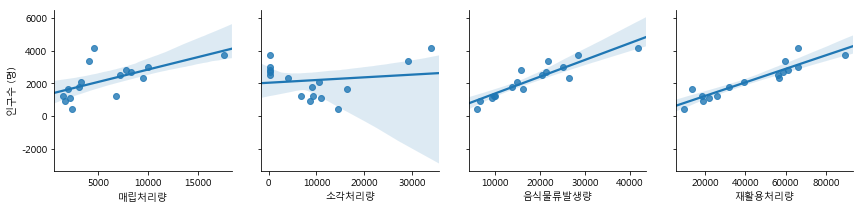

In [28]:
#생활폐기물 각 통계항목과 인구대비 상관성 비교
#sns.pairplot(data_merge, vars=['인구수 (명)','매립처리량','소각처리량','음식물류발생량','재활용처리량'], kind='reg', size=3)
data_merge_people_div100=data_merge[:]
data_merge_people_div100['인구수 (명)'] = data_merge_people_div100['인구수 (명)']/100
sns.pairplot(data_merge_people_div100,  y_vars=['인구수 (명)'], x_vars=['매립처리량','소각처리량','음식물류발생량','재활용처리량'], kind='reg', size=3)
plt.show()

In [29]:
import json
geo_json = './data/skorea_municipalities_geo_all.json'
geo_seoul_gu = json.load(open(geo_json,encoding='utf-8'))

In [30]:
#geo_seoul_gu

In [31]:
geo_busan={'type': 'FeatureCollection',
 'features':[]}
#geo_seoul_gu

In [32]:
for element in geo_seoul_gu['features']:
    if element['id'].split()[0]=='부산':
        geo_busan['features'].append(element)
geo_busan

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'id': '부산 기장',
   'properties': {'code': '21310',
    'name': '기장군',
    'name_eng': 'Gijang-gun',
    'base_year': '2013'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[129.2052495079534, 35.384810829415144],
      [129.21999816556436, 35.37561304214919],
      [129.26755198854022, 35.38341226661066],
      [129.2857909875702, 35.35965182306521],
      [129.2821380596251, 35.33844963971255],
      [129.30681468573164, 35.32644771030098],
      [129.2675569665142, 35.31604143854397],
      [129.26275266580004, 35.27831941566859],
      [129.24546065083584, 35.26120427164311],
      [129.25565431808167, 35.243593230216504],
      [129.23550974472084, 35.21139611410482],
      [129.22731336081907, 35.1832196018314],
      [129.2101963573097, 35.178863012450506],
      [129.20926574987496, 35.193858050365115],
      [129.1712609088194, 35.19779178977021],
      [129.15946955367855, 35.2060010318845],
      [129

In [33]:
import folium

In [34]:
data_merge['폐기물'] = data_merge['폐기물'] / data_merge['폐기물'].max()*100

In [35]:
data_merge['폐기물']

구군
강서구      28.340904
금정구      57.135355
기장군      32.914569
남구       57.762819
동구       24.428803
동래구      60.387936
부산진구     92.591835
북구       69.261093
사상구      66.108087
사하구      78.058545
서구       30.262171
수영구      39.425189
연제구      46.295235
영도구      31.532785
중구       21.978966
해운대구    100.000000
Name: 폐기물, dtype: float64

In [36]:
# 부산시내 공기 좋은곳(연할수록 공기 좋음.)

map = folium.Map(location=[35.179741, 129.075022], zoom_start=10)
#마커처리 

# tmp_pop_crime_rate = crime_anal_normal['범죄']/crime_anal_normal['인구수'] * 1000000
map.choropleth(geo_data = geo_busan,
                data=data_merge,
               columns=[data_merge.index,'폐기물'],
               key_on='properties.name',
               fill_color='YlGn',
               legend_name='자치구별 폐기물량'
              )
map

In [37]:
import requests

In [38]:
url = '''https://dapi.kakao.com/v2/local/search/keyword.json?query={0}&category_group_code=PO3
'''.format('연제구청')
KAKAO_API_KEY = 'f9bcade751569c67742c3c82a2e2f2af'
headers = {
    'Authorization':'KakaoAK {0}'.format(KAKAO_API_KEY)
}
res = requests.get(url, headers=headers)
res.json()

{'documents': [{'address_name': '부산 연제구 연산동 1555',
   'category_group_code': 'PO3',
   'category_group_name': '공공기관',
   'category_name': '사회,공공기관 > 지방행정기관 > 구청',
   'distance': '',
   'id': '11103035',
   'phone': '051-851-7851',
   'place_name': '연제구청',
   'place_url': 'http://place.map.daum.net/11103035',
   'road_address_name': '부산 연제구 연제로 2',
   'x': '129.07971814108146',
   'y': '35.176215693331486'}],
 'meta': {'is_end': True,
  'pageable_count': 1,
  'same_name': {'keyword': '연제구청', 'region': [], 'selected_region': ''},
  'total_count': 1}}

In [39]:
# 검색어를 던져서 응답 데이터중에 주소, 위도, 경도, 질의어 리턴 함수
def netGetGeocoder(query):    
    url = '''https://dapi.kakao.com/v2/local/search/keyword.json?query={0}&category_group_code=PO3
    '''.format(query)
    KAKAO_API_KEY = 'f9bcade751569c67742c3c82a2e2f2af'
    headers = {
        'Authorization':'KakaoAK {0}'.format(KAKAO_API_KEY)
    }    
    #API 쿼리 수행
    res = requests.get(url, headers=headers)
    res = res.json()
    # 데이터 추출 : 주소, 위도, 경도, 질의어 순으로 튜플 형태로 리턴
    return res['documents'][0]['address_name'],res['documents'][0]['y'],res['documents'][0]['x'],res['documents'][0]['place_name']
     

In [40]:
# 반복해서 관할서의 이름을 완성하여 출력(print)하시오.
# 진행율
from tqdm import tqdm_notebook

#데이터를 담는 자료형

police_station_info = []

#경찰서 이름 개수만큼 반복
for name in tqdm_notebook(data_merge.index):
    #검색어 획득
    query  = '%s청'%name
    
    police_station_info.append(netGetGeocoder(query))


    
    
    

In [41]:
addrs = [element[0] for element in police_station_info]
lats = [element[1] for element in police_station_info]
lngs = [element[2] for element in police_station_info]
names = [element[3] for element in police_station_info]

In [42]:
data_merge['lat']=lats
data_merge['lngs']=lngs

In [43]:
data_merge

,매립처리량,소각처리량,음식물류발생량,재활용처리량,구군,폐기물,남자인구수 (명),동수 (개소),면적 (㎢),세대수 (세대),시전체 인구에 대한 구성비 (%),여자인구수 (명),인구수 (명),lat,lngs
구군,,,,,,,,,,,,,,,
강서구,6752,6767,9669,18366,강서구,28.340904,66222,8,181.49,48718,3.6,58407,124629,37.55096371771019,126.84953564354552
금정구,7213,213,20314,56033,금정구,57.135355,121769,17,65.27,105690,7.1,126837,248606,35.242777265953485,129.0921055569297
기장군,1928,16474,16233,13625,기장군,32.914569,82211,5,218.30,66765,4.7,83107,165318,35.244416441971964,129.2224227931456
남구,7763,328,15636,60966,남구,57.762819,139248,17,26.81,115729,8.1,144136,283384,35.132835638507196,126.90241661118219
동구,1677,8665,6535,18941,동구,24.428803,44265,12,9.74,43326,2.6,45577,89842,37.65877819311029,126.77501316240807
동래구,8289,203,21184,58866,동래구,60.387936,132497,13,16.63,109040,7.7,138312,270809,35.204970144455714,129.0836698663755
부산진구,17595,167,28469,89529,부산진구,92.591835,180298,20,29.67,166084,10.6,190142,370440,35.16285552776291,129.053168675531
북구,9979,252,25055,66266,북구,69.261093,149887,13,39.37,120175,8.6,152469,302356,35.19729509995017,128.9900350633391
사상구,9514,4098,26349,56968,사상구,66.108087,117433,12,36.09,96676,6.6,113806,231239,35.15261141635454,128.99114139358235


In [44]:
data_merge['인구수 (명)'] = data_merge['인구수 (명)']/1000
data_merge.rename(columns={'인구수 (명)':'인구수 (천)'}, inplace=True)

In [45]:
map = folium.Map(location=[35.179741, 129.075022], zoom_start=11)
#마커처리 

# tmp_pop_crime_rate = crime_anal_normal['범죄']/crime_anal_normal['인구수'] * 1000000
map.choropleth(geo_data = geo_busan,
                data=data_merge,
               columns=[data_merge.index,'폐기물'],
               key_on='properties.name',
               fill_color='PuRd',
               legend_name='자치구별 폐기물량'
              )
for idx in data_merge.index:
    gps_list = [float(data_merge['lat'][idx]),float(data_merge['lngs'][idx])]
    folium.Marker(gps_list,
                  popup='%s청' % data_merge['구군'][idx] , 
                  icon=folium.Icon(icon='cloud')).add_to(map) 
    folium.CircleMarker(gps_list, radius=data_merge['인구수 (천)'][idx]/10,
                        color='blue',
                        fill_color='#333333').add_to(map)

map
